In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
df = pd.read_excel("Dubai Properties.xlsx")

In [199]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 73742 non-null  object        
 1    Rent                   73742 non-null  object        
 2   Beds                    73742 non-null  int64         
 3   Baths                   73742 non-null  int64         
 4   Type                    73742 non-null  object        
 5   Area_in_sqft            73742 non-null  int64         
 6   Rent_per_sqft           73742 non-null  float64       
 7   Rent_category           73742 non-null  object        
 8   Frequency               73742 non-null  object        
 9   Furnishing              73742 non-null  object        
 10  Purpose                 73742 non-null  object        
 11  Posted_date             73742 non-null  datetime64[ns]
 12  Age_of_listing_in_days  73742 non-null  int64 

In [201]:
df.isnull().sum()

Address                     0
 Rent                       0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [202]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)

# Convert Rent and Area to numeric
df["Rent"] = pd.to_numeric(df["Rent"], errors="coerce")
df["Area_in_sqft"] = pd.to_numeric(df["Area_in_sqft"], errors="coerce")


In [203]:
df.isnull().sum()

Address                     0
Rent                       15
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [204]:
# Drop rows with missing key values
df = df.dropna(subset=["Rent", "Area_in_sqft", "Beds", "Baths"])
df = df.ffill()

In [205]:
df.isnull().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

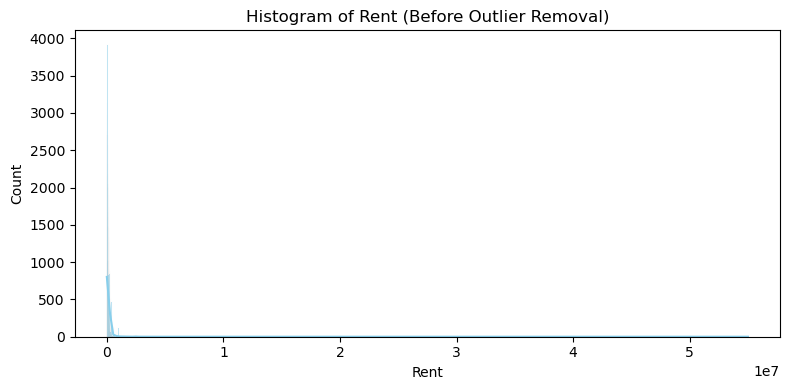

In [206]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Rent"], kde=True, color="skyblue")
plt.title("Histogram of Rent (Before Outlier Removal)")
plt.xlabel("Rent")
plt.tight_layout()
plt.show()

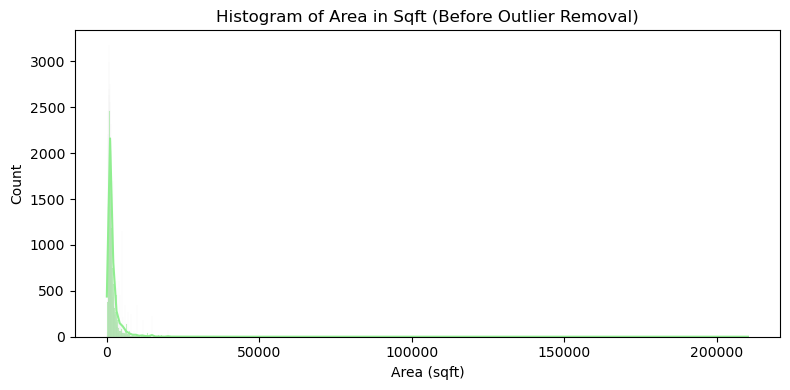

In [207]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Area_in_sqft"], kde=True, color="lightgreen")
plt.title("Histogram of Area in Sqft (Before Outlier Removal)")
plt.xlabel("Area (sqft)")
plt.tight_layout()
plt.show()

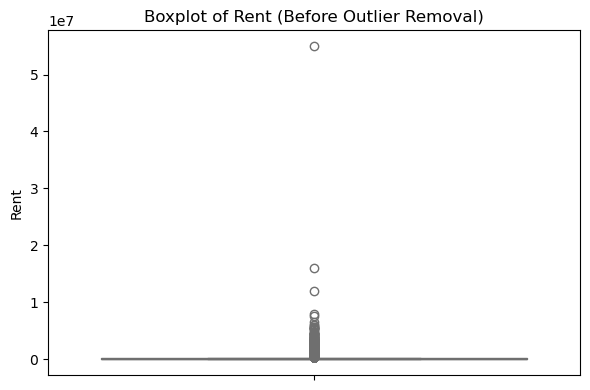

In [208]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="Rent", data=df, color="skyblue")
plt.title("Boxplot of Rent (Before Outlier Removal)")
plt.tight_layout()
plt.show()

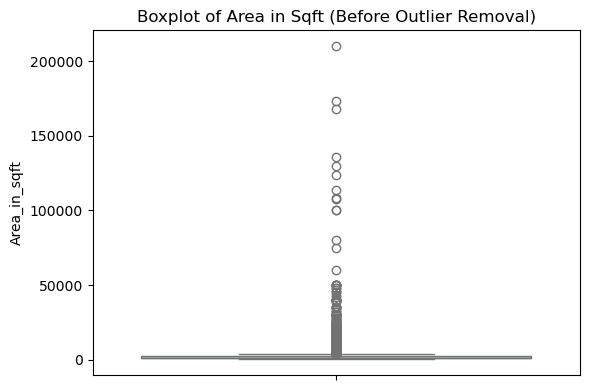

In [209]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="Area_in_sqft", data=df, color="lightgreen")
plt.title("Boxplot of Area in Sqft (Before Outlier Removal)")
plt.tight_layout()
plt.show()

In [210]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers(df, "Rent")
df = remove_outliers(df, "Area_in_sqft")

C:\Users\VICKY\AppData\Local\Temp\ipykernel_2388\2224402900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=df, palette="Set2")


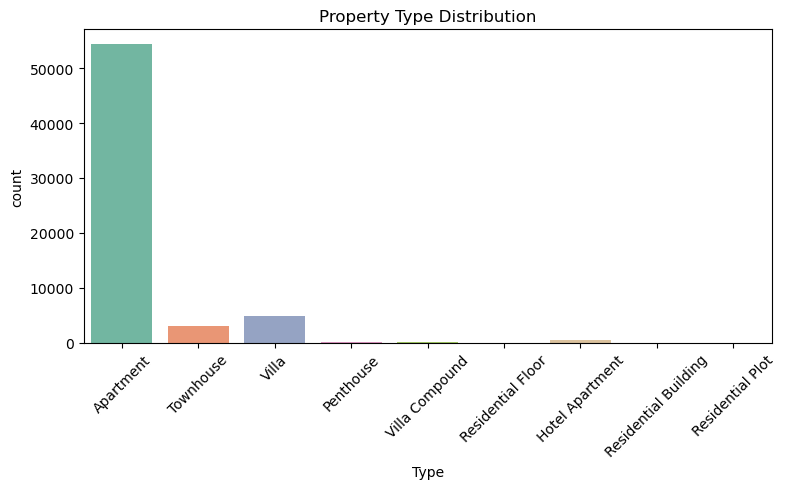

In [211]:
# 2. Countplot: Property Types
plt.figure(figsize=(8, 5))
sns.countplot(x="Type", data=df, palette="Set2")
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\VICKY\AppData\Local\Temp\ipykernel_2388\48774104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent.values, y=avg_rent.index, palette="coolwarm")


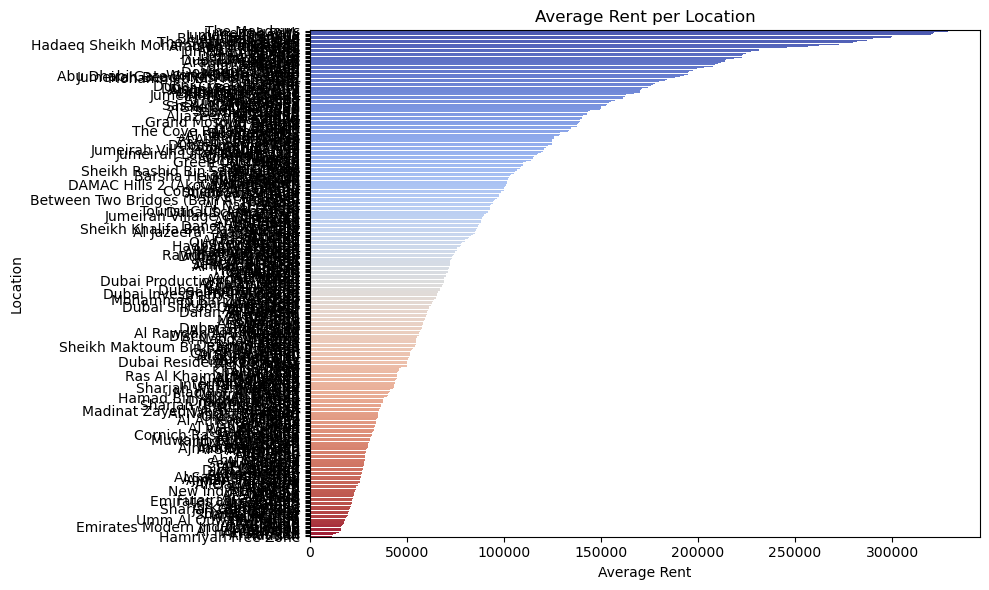

In [212]:
# 3. Barplot: Average Rent by Location
plt.figure(figsize=(10, 6))
avg_rent = df.groupby("Location")["Rent"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rent.values, y=avg_rent.index, palette="coolwarm")
plt.title("Average Rent per Location")
plt.xlabel("Average Rent")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

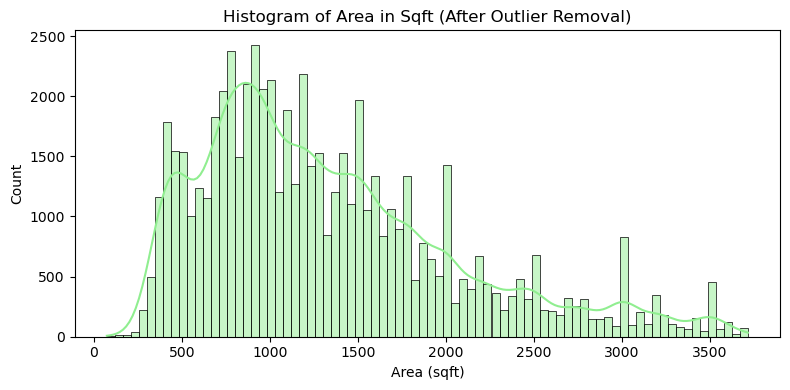

In [213]:
# Histogram for Area_in_sqft
plt.figure(figsize=(8, 4))
sns.histplot(df["Area_in_sqft"], kde=True, color="lightgreen")
plt.title("Histogram of Area in Sqft (After Outlier Removal)")
plt.xlabel("Area (sqft)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

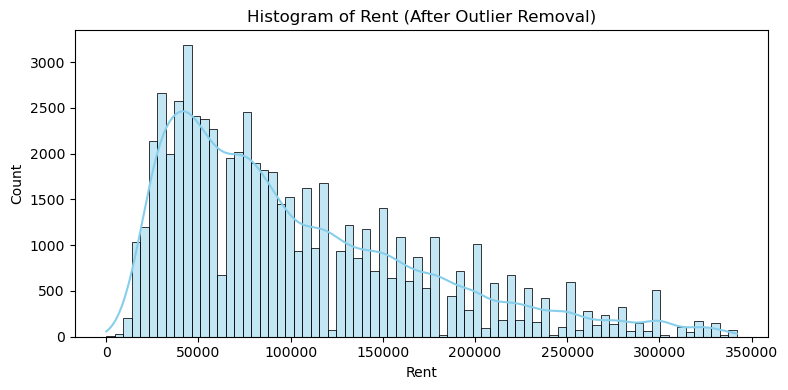

In [214]:
# Histogram for Rent
plt.figure(figsize=(8, 4))
sns.histplot(df["Rent"], kde=True, color="skyblue")
plt.title("Histogram of Rent (After Outlier Removal)")
plt.xlabel("Rent")
plt.ylabel("Count")
plt.tight_layout()
plt.show()